# Daten lesen

Pandas besitzt umfangreiche Möglichkeiten des Dateiimports.

Zwei Beispiele:

* read_csv()
* read_html()


## read_csv


[pandas.read_csv — pandas 2.1.4 documentation](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html#pandas-read-csv)

~~~
pandas.read_csv(*filepath\_or\_buffer*, ***, *sep=\_NoDefault.no\_default*, *delimiter=None*, *header='infer'*, *names=\_NoDefault.no\_default*, *index_col=None*, *usecols=None*, *dtype=None*, *engine=None*, *converters=None*, *true_values=None*, *false_values=None*, *skipinitialspace=False*, *skiprows=None*, *skipfooter=0*, *nrows=None*, *na_values=None*, *keep\_default\_na=True*, *na_filter=True*, *verbose=False*, *skip\_blank\_lines=True*, *parse_dates=None*, *infer\_datetime\_format=\_NoDefault.no\_default*, *keep\_date\_col=False*, *date_parser=\_NoDefault.no\_default*, *date_format=None*, *dayfirst=False*, *cache_dates=True*, *iterator=False*, *chunksize=None*, *compression='infer'*, *thousands=None*, *decimal='.'*, *lineterminator=None*, *quotechar='"'*, *quoting=0*, *doublequote=True*, *escapechar=None*, *comment=None*, *encoding=None*, *encoding_errors='strict'*, *dialect=None*, *on\_bad\_lines='error'*, *delim_whitespace=False*, *low_memory=True*, *memory_map=False*, *float_precision=None*, *storage_options=None*, *dtype_backend=\_NoDefault.no\_default*)
~~~

Einige Beispiele:

* pd.read_csv(fn): liest eine CSV-Datei mit dem Namen fn.
* pd.read_csv(fn,  skiprows=4, sep='\s+', 
            thousands='.', decimal=',',
             converters = {'Datum': str}, na_values='-')): die ersten 4 Zeilen werden nicht gelesen, Spaltenwerte werden von mindestens einem Leerzeichen oder Tabulator getrennt, Tausendertrenner ist ein Punkt, Dezimaltrenner ein Komma, das Feld "Datum" wird in einen String umgewandelt und ein Strich steht für NaN.


## read_html

[pandas.read_html — pandas 2.1.4 documentation](https://pandas.pydata.org/docs/reference/api/pandas.read_html.html#pandas.read_html)


~~~
pandas.read_html(*io*, ***, *match='.+'*, *flavor=None*, *header=None*, *index_col=None*, *skiprows=None*, *attrs=None*, *parse_dates=False*, *thousands=','*, *encoding=None*, *decimal='.'*, *converters=None*, *na_values=None*, *keep\_default\_na=True*, *displayed_only=True*, *extract_links=None*, *dtype_backend=\_NoDefault.no\_default*, *storage_options=None*)
~~~

Praktisches Beispiel: lese die Tabelle auf der Seite "[Zeitreihe der Lufttemperatur in Deutschland – Wikipedia](https://de.wikipedia.org/wiki/Zeitreihe_der_Lufttemperatur_in_Deutschland)"

In [1]:
%reset -f

import numpy as np
import pandas as pd

fn = 'https://de.wikipedia.org/wiki/Prim%C3%A4renergieverbrauch'

dfl = pd.read_html(fn)
type(dfl)

list

In [2]:
# helper in case scrollbar is missing
from IPython.display import display, HTML
display(HTML("<style>.jp-OutputArea-output {display:flex}</style>"))


In [3]:
df = dfl[1]
df

Primärenergieverbrauch in der Bundesrepublik Deutschland nach Energieträgern Angaben in Petajoule[1][16]  \
                                                                                            Energieträger⁠5   
0                                           Mineralöl                                                         
1                                    Erdgas, Erdölgas                                                         
2                                          Steinkohle                                                         
3                                          Braunkohle                                                         
4                                         Kernenergie                                                         
5                          Wasser- und Windkraft⁠1 ⁠2                                                         
6                                andere Erneuerbare⁠3                                                         
7                                          Sonstige⁠4                                                         
8                             Außenhandelssaldo Strom                                                         
9                                              Gesamt                                                         
10  Bevölkerungsstand am Vorjahresende in 1000 (ge...                                                         
11  Rechnerischer Mittelwert pro Kopf der Bevölker...                                                         
12                                       in Gigajoule                                                         
13                                 in Kilowattstunden                                                         

                                                       \
                                                 1990   
0                                               5.217   
1                                               2.293   
2                                               2.306   
3                                               3.201   
4                                               1.668   
5                                                  58   
6                                                 139   
7                                                  22   
8                                                   3   
9                                              14.905   
10                                           79.113⁠6   
11  Rechnerischer Mittelwert pro Kopf der Bevölker...   
12                                               1884   
13                                             52.376   

                                                       \
                                                 1995   
0                                               5.689   
1                                               2.799   
2                                               2.060   
3                                               1.734   
4                                               1.682   
5                                                  83   
6                                                 191   
7                                                  13   
8                                                  17   
9                                              14.269   
10                                             81.539   
11  Rechnerischer Mittelwert pro Kopf der Bevölker...   
12                                               1750   
13                                             48.649   

                                                       \
                                                 2000   
0                                               5.499   
1                                               2.985   
2                                               2.021   
3                                               1.550   
4                                               1.851   
5

In [4]:
df = df.iloc[:9,:-1]

In [5]:
df.shape

(9, 17)

In [6]:
df.columns[:5]

MultiIndex([('Primärenergieverbrauch in der Bundesrepublik Deutschland nach Energieträgern Angaben in Petajoule[1][16]', ...),
            ('Primärenergieverbrauch in der Bundesrepublik Deutschland nach Energieträgern Angaben in Petajoule[1][16]', ...),
            ('Primärenergieverbrauch in der Bundesrepublik Deutschland nach Energieträgern Angaben in Petajoule[1][16]', ...),
            ('Primärenergieverbrauch in der Bundesrepublik Deutschland nach Energieträgern Angaben in Petajoule[1][16]', ...),
            ('Primärenergieverbrauch in der Bundesrepublik Deutschland nach Energieträgern Angaben in Petajoule[1][16]', ...)],
           )

In [7]:
dg = df.copy()
dg.columns = dg.columns.droplevel()
dg.shape

(9, 17)

In [8]:
dg

,Energieträger⁠5,1990,1995,2000,2005,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Mineralöl,5.217,5.689,5.499,5.166,4.684,4.525,4.527,4.628,4.493,4.472,4.563,4.671,4.452,4.511,4.087,4.039
1,"Erdgas, Erdölgas",2.293,2.799,2.985,3.250,3.171,2.911,2.920,3.059,2.660,2.800,3.043,3.159,3.091,3.214,3.136,3.302
2,Steinkohle,2.306,2.060,2.021,1.808,1.714,1.715,1.725,1.840,1.759,1.718,1.635,1.502,1.428,1.084,896,1.108
3,Braunkohle,3.201,1.734,1.550,1.596,1.512,1.564,1.645,1.629,1.574,1.565,1.525,1.507,1.476,1.163,958,1.127
4,Kernenergie,1.668,1.682,1.851,1.779,1.533,1.178,1.085,1.061,1.060,1.001,923,833,829,819,702,754
5,Wasser- und Windkraft⁠1 ⁠2,58,83,127,173,254,309,356,381,407,523,529,594,625,691,720,1.949
6,andere Erneuerbare⁠3,139,191,290,596,1.160,1.153,1.029,1.118,1.112,1.144,1.163,1.203,1.177,1.213,1.242,1.949
7,Sonstige⁠4,22,13,68,222,254,267,244,222,237,242,242,243,222,226,226,192
8,Außenhandelssaldo Strom,3,17,11,−31,−64,−23,−83,−116,−122,−174,−200,−189,−175,−118,−68,−67


In [9]:
dg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Energieträger⁠5  9 non-null      object
 1   1990             9 non-null      object
 2   1995             9 non-null      object
 3   2000             9 non-null      object
 4   2005             9 non-null      object
 5   2010             9 non-null      object
 6   2011             9 non-null      object
 7   2012             9 non-null      object
 8   2013             9 non-null      object
 9   2014             9 non-null      object
 10  2015             9 non-null      object
 11  2016             9 non-null      object
 12  2017             9 non-null      object
 13  2018             9 non-null      object
 14  2019             9 non-null      object
 15  2020             9 non-null      object
 16  2021             9 non-null      object
dtypes: object(17)
memory usage: 1.3+ KB


Daten werden nicht als Zahl erkannt.

In [10]:
%reset -f

import pandas as pd

fn = 'https://de.wikipedia.org/wiki/Prim%C3%A4renergieverbrauch'

dfl = pd.read_html(fn, thousands='.', decimal=',')
df = dfl[1]
df = df.iloc[:9,:-1]
dg = df.copy()
dg.columns = dg.columns.droplevel()
dg = dg.set_index(dg.columns[0]) #,drop = True)
dg.index.name = 'Energieträger'
dg.shape

(9, 16)

In [11]:
dg.head()

,1990,1995,2000,2005,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
Energieträger,,,,,,,,,,,,,,,,
Mineralöl,5217,5689,5499,5166,4684,4525,4527,4628,4493,4472,4563,4671,4452,4511,4087,4039
"Erdgas, Erdölgas",2293,2799,2985,3250,3171,2911,2920,3059,2660,2800,3043,3159,3091,3214,3136,3302
Steinkohle,2306,2060,2021,1808,1714,1715,1725,1840,1759,1718,1635,1502,1428,1084,896,1108
Braunkohle,3201,1734,1550,1596,1512,1564,1645,1629,1574,1565,1525,1507,1476,1163,958,1127
Kernenergie,1668,1682,1851,1779,1533,1178,1085,1061,1060,1001,923,833,829,819,702,754


In [12]:
dg.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9 entries, Mineralöl to Außenhandelssaldo Strom
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   1990    9 non-null      object
 1   1995    9 non-null      object
 2   2000    9 non-null      object
 3   2005    9 non-null      object
 4   2010    9 non-null      object
 5   2011    9 non-null      object
 6   2012    9 non-null      object
 7   2013    9 non-null      object
 8   2014    9 non-null      object
 9   2015    9 non-null      object
 10  2016    9 non-null      object
 11  2017    9 non-null      object
 12  2018    9 non-null      object
 13  2019    9 non-null      object
 14  2020    9 non-null      object
 15  2021    9 non-null      object
dtypes: object(16)
memory usage: 1.2+ KB


In [13]:
try:
    dg.iloc[:,1:].astype(int)
except ValueError as msg:
    print('Value Error: ', msg)

Value Error:  invalid literal for int() with base 10: '−31'


In [14]:
dg.iloc[:,1:3].astype(int)

,1995,2000
Energieträger,,
Mineralöl,5689,5499
"Erdgas, Erdölgas",2799,2985
Steinkohle,2060,2021
Braunkohle,1734,1550
Kernenergie,1682,1851
Wasser- und Windkraft⁠1 ⁠2,83,127
andere Erneuerbare⁠3,191,290
Sonstige⁠4,13,68
Außenhandelssaldo Strom,17,11


In [15]:
# Where is the error? First two columns are converted without probems, but not the others
dg

,1990,1995,2000,2005,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
Energieträger,,,,,,,,,,,,,,,,
Mineralöl,5217,5689,5499,5166,4684,4525,4527,4628,4493,4472,4563,4671,4452,4511,4087,4039
"Erdgas, Erdölgas",2293,2799,2985,3250,3171,2911,2920,3059,2660,2800,3043,3159,3091,3214,3136,3302
Steinkohle,2306,2060,2021,1808,1714,1715,1725,1840,1759,1718,1635,1502,1428,1084,896,1108
Braunkohle,3201,1734,1550,1596,1512,1564,1645,1629,1574,1565,1525,1507,1476,1163,958,1127
Kernenergie,1668,1682,1851,1779,1533,1178,1085,1061,1060,1001,923,833,829,819,702,754
Wasser- und Windkraft⁠1 ⁠2,58,83,127,173,254,309,356,381,407,523,529,594,625,691,720,1949
andere Erneuerbare⁠3,139,191,290,596,1160,1153,1029,1118,1112,1144,1163,1203,1177,1213,1242,1949
Sonstige⁠4,22,13,68,222,254,267,244,222,237,242,242,243,222,226,226,192
Außenhandelssaldo Strom,3,17,11,−31,−64,−23,−83,−116,−122,−174,−200,−189,−175,−118,−68,−67


Problem: "−"

|Zeichen|Bezeichnung                         |Unicode-Name       |Unicode-Nummer|
|-------|------------------------------------|-------------------|--------------|
|-      |Bindestrich-Minus (auch Mittestrich)|Hyphen-Minus       |U+002d        |
|‐      |Bindestrich (auch Divis)            |Hypen              |U+2010        |
|‑      |Geschützter Bindestrich             |Non-Breaking Hyphen|U+2011        |
|–      |Gedankenstrich                      |En Dash            |U+2013        |
|—      |Geviertstrich                       |Em Dash            |U+2014        |

Dies ist nur ein Auszug. Es gibt weitere Striche, die sich nur in der UTF8-Kodierung, nicht aber im Aussehen unterscheiden.

Eingabe von UTF8-Zeichen (unter Linux + Jupyter-Lab): `<ctrl><shft>U1234`
Beispiel Rakete: U+1F680:  🚀


In [16]:
dg = dg.replace('−','-', regex=True)
dg = dg.astype(int)
dg.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9 entries, Mineralöl to Außenhandelssaldo Strom
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   1990    9 non-null      int64
 1   1995    9 non-null      int64
 2   2000    9 non-null      int64
 3   2005    9 non-null      int64
 4   2010    9 non-null      int64
 5   2011    9 non-null      int64
 6   2012    9 non-null      int64
 7   2013    9 non-null      int64
 8   2014    9 non-null      int64
 9   2015    9 non-null      int64
 10  2016    9 non-null      int64
 11  2017    9 non-null      int64
 12  2018    9 non-null      int64
 13  2019    9 non-null      int64
 14  2020    9 non-null      int64
 15  2021    9 non-null      int64
dtypes: int64(16)
memory usage: 1.2+ KB


In [17]:
dg.T.head()

Energieträger,Mineralöl,"Erdgas, Erdölgas",Steinkohle,Braunkohle,Kernenergie,Wasser- und Windkraft⁠1 ⁠2,andere Erneuerbare⁠3,Sonstige⁠4,Außenhandelssaldo Strom
1990,5217,2293,2306,3201,1668,58,139,22,3
1995,5689,2799,2060,1734,1682,83,191,13,17
2000,5499,2985,2021,1550,1851,127,290,68,11
2005,5166,3250,1808,1596,1779,173,596,222,-31
2010,4684,3171,1714,1512,1533,254,1160,254,-64


/home/rp/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


<Axes: >

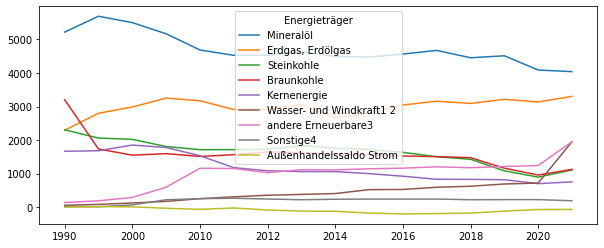

In [18]:
dg = dg.T
dg.plot(figsize=(10,4))

<Axes: >

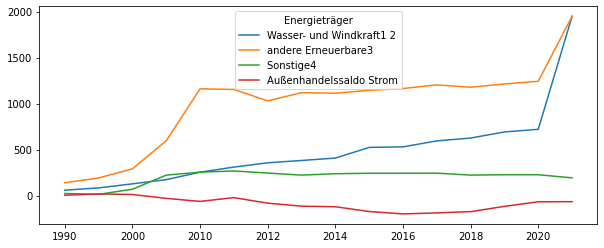

In [19]:
dg.iloc[:,[-4,-3,-2,-1]].plot(figsize=(10,4))
#plt.show()

## Daten speichern

In [20]:
dg.head()

Energieträger,Mineralöl,"Erdgas, Erdölgas",Steinkohle,Braunkohle,Kernenergie,Wasser- und Windkraft⁠1 ⁠2,andere Erneuerbare⁠3,Sonstige⁠4,Außenhandelssaldo Strom
1990,5217,2293,2306,3201,1668,58,139,22,3
1995,5689,2799,2060,1734,1682,83,191,13,17
2000,5499,2985,2021,1550,1851,127,290,68,11
2005,5166,3250,1808,1596,1779,173,596,222,-31
2010,4684,3171,1714,1512,1533,254,1160,254,-64


In [26]:
dg.to_csv("test1.csv", index = None)
dg.to_json("test1.json", index = None)
dg.to_html("test1.html", index = None)
dg.to_excel("test1.ods", index = None)

In [29]:
try:
    dg.to_xml("test1.xml", index = None)
except ValueError as msg:
    print(msg)

Invalid tag name 'Erdgas, Erdölgas'


In [41]:
dh = dg.copy()
numcolumns = dh.shape[1]
dh.columns = list('abcdefghi') #list(range(numcolumns))
dh.head(2)


,a,b,c,d,e,f,g,h,i
1990,5217,2293,2306,3201,1668,58,139,22,3
1995,5689,2799,2060,1734,1682,83,191,13,17


In [42]:
dh.to_xml("test1.xml", index = None)